In [38]:
# Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Procesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels as sms
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera


# configuración de matplotlib
plt.rcParams['image.cmap']="bwr"
plt.rcParams['figure.dpi']="100"
plt.rcParams['savefig.bbox']="tight"
style.use('ggplot') or plt.style.use('ggplot')

# configuración de warnings
import warnings
warnings.filterwarnings('ignore')


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
auto = pd.read_csv('/Auto.csv')
print(auto.shape)
auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [41]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Vea la descripción de las variables en el siguinete link https://rdrr.io/cran/ISLR/man/Auto.html

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [43]:
auto['horsepower'] = auto['horsepower'].replace('?',np.nan)
auto.isna().sum()



,0
mpg,0
cylinders,0
displacement,0
horsepower,5
weight,0
acceleration,0
year,0
origin,0
name,0


In [44]:
auto = auto.dropna()
auto['horsepower'] = auto['horsepower'].astype('int')

In [45]:
auto = auto.dropna()
auto = auto.sort_values(by = ['horsepower'],ascending = True,axis = 0)

In [46]:
auto.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
year,0
origin,0
name,0


In [47]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel


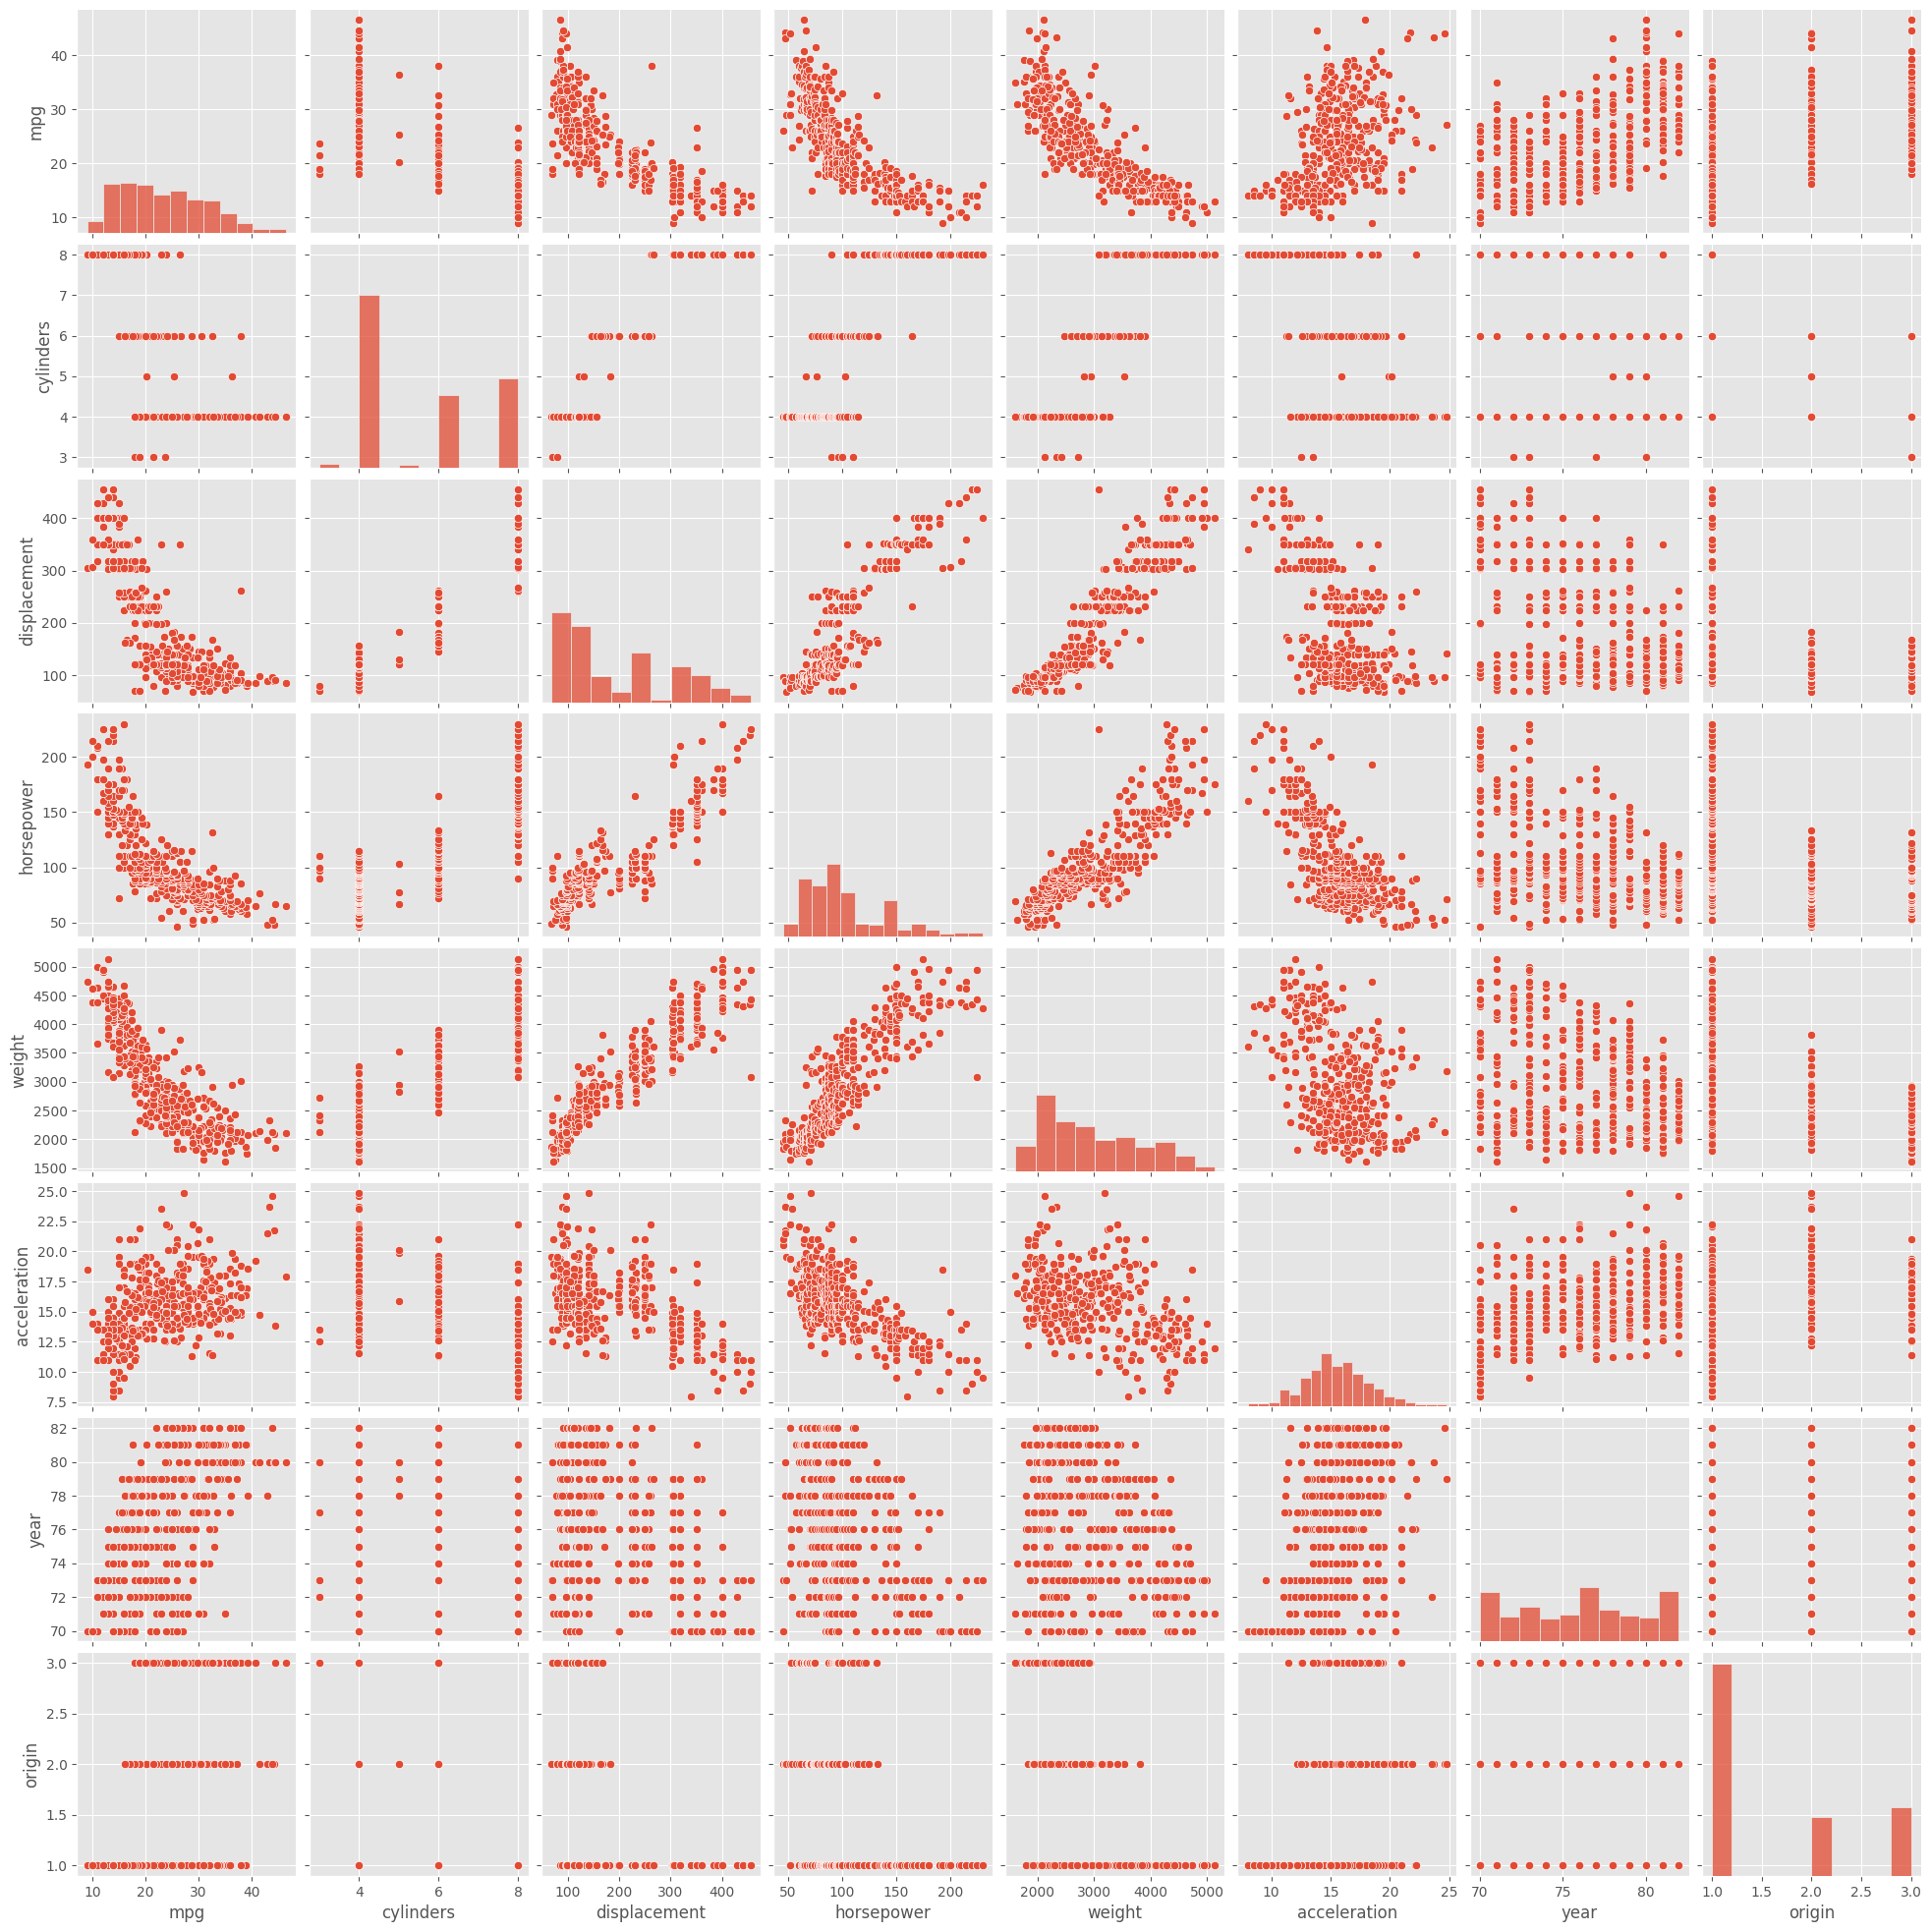

In [48]:
sns.pairplot(auto)

In [49]:
def fit_degree(data,var,target,degree):
    poly = PolynomialFeatures(degree)
    poly_data = poly.fit_transform(data[var].to_frame())
    lin_model = LinearRegression(fit_intercept=False)
    lin_model.fit(poly_data,data[target])
    pred = lin_model.predict(poly_data)

    return pred

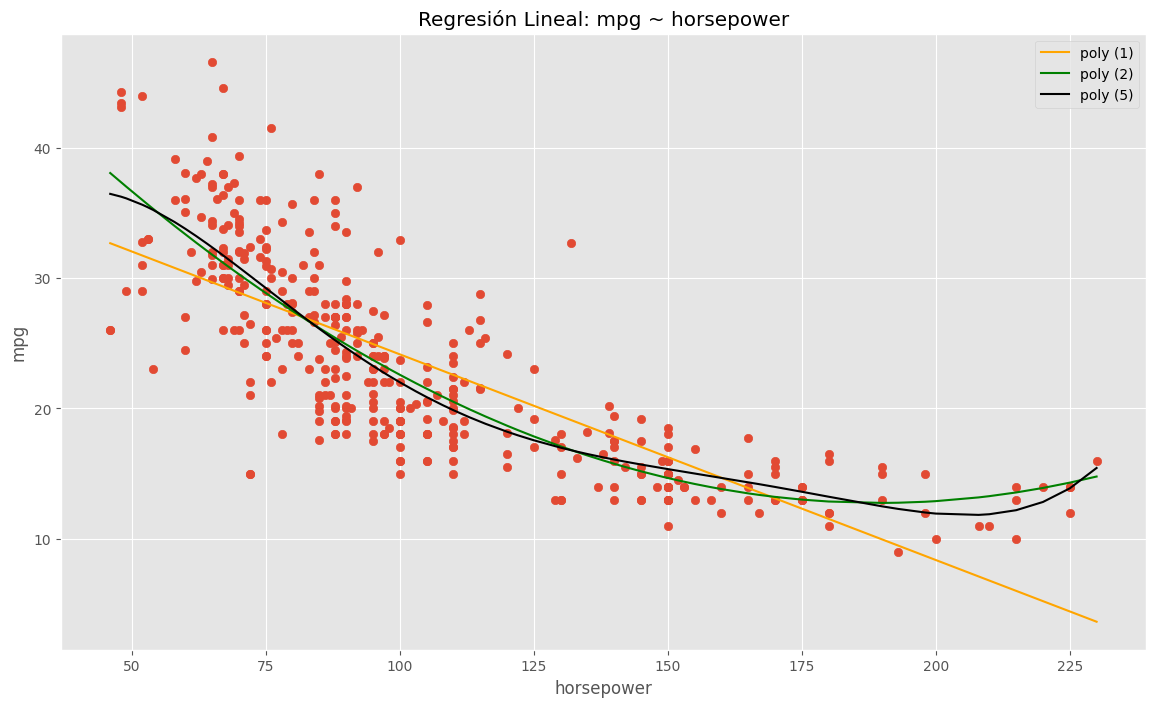

In [50]:
pred_1 = fit_degree(auto,'horsepower','mpg',1)
pred_2 = fit_degree(auto,'horsepower','mpg',2)
pred_5 = fit_degree(auto,'horsepower','mpg',5)

plt.figure(figsize = (14,8))
plt.scatter(auto['horsepower'],auto['mpg'])
plt.plot(auto['horsepower'],pred_1,color = 'orange',label='poly (1)')
plt.plot(auto['horsepower'],pred_2,color = 'green',label='poly (2)')
plt.plot(auto['horsepower'],pred_5,color = 'black',label='poly (5)')
# Etiquetas y leyenda
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('Regresión Lineal: mpg ~ horsepower')
plt.legend()
plt.show()

In [51]:
import statsmodels.api as sm

# Ajuste con polinomio de grado 2

In [52]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(auto['horsepower'].to_frame())

In [53]:
modelo_poly2 = sm.OLS(auto['mpg'],poly_data)
modelo_poly2 = modelo_poly2.fit()
modelo_poly2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           5.40e-99
Time:                        01:22:15   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.000      53.360      60.440
x1            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
x2             0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Supuestos del modelo

## Normalidad de los errores

Media de los residuales: 5.512778442357093e-13


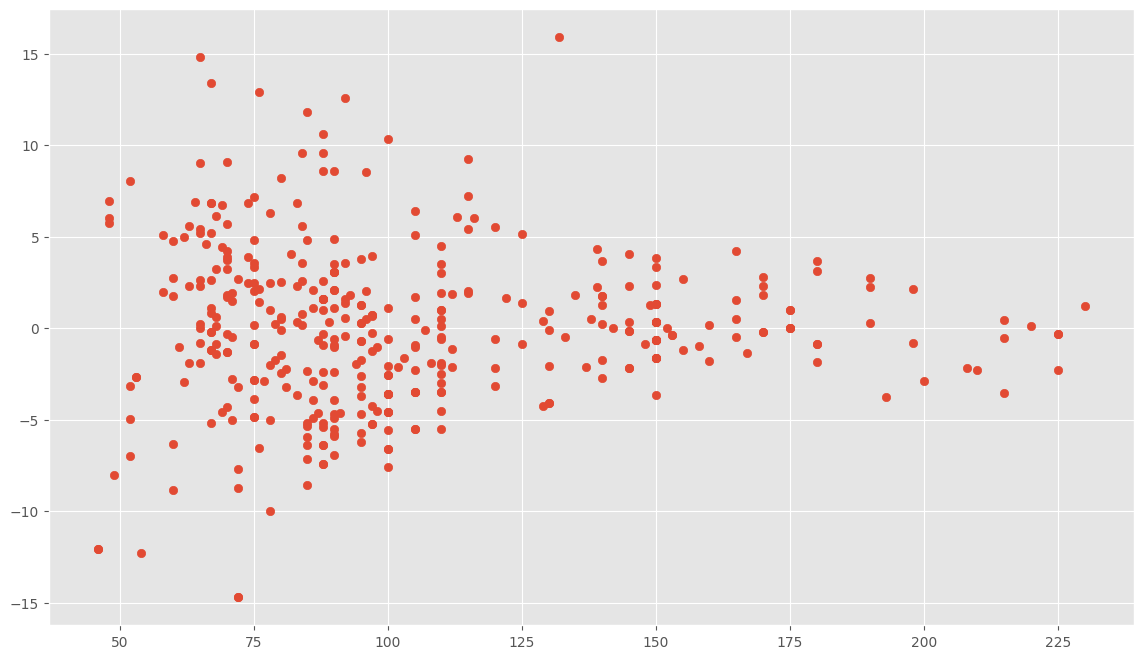

In [54]:
resid_val = modelo_poly2.resid
plt.figure(figsize = (14,8))
plt.scatter(auto['horsepower'],resid_val)
fittet_val = modelo_poly2.predict()
print(f"Media de los residuales: {modelo_poly2.resid.mean()}")

In [55]:
stat, p_value, _, _ = jarque_bera(resid_val)

print(f'Estadístico de Jarque-Bera: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value > 0.05:
    print("No se rechaza H0: Los residuos parecen normales")
else:
    print("Se rechaza H0: Los residuos NO son normales")

Estadístico de Jarque-Bera: 30.6615
P-valor: 0.0000
Se rechaza H0: Los residuos NO son normales


## Autocorrelación

### Prueba de Durbin-Watson

### Hipótesis:
- $H_0$: No hay autocorrelación en los residuos ($\rho = 0$).
- $H_1$:Existe autocorrelación en los residuos ($\rho \neq 0$).

In [56]:
# Calcular el estadístico de Durbin-Watson
dw_statistic = durbin_watson(modelo_poly2.resid)

# Imprimir el resultado
print(f'Estadístico de Durbin-Watson: {dw_statistic}')

# 2: No hay autocorrelación.
# < 2: Posible autocorrelación positiva.
# > 2: Posible autocorrelación negativa

Estadístico de Durbin-Watson: 1.6631220895021988


## Realiza y describe el análisis del modelo

# Ajuste con polinomio de grado 1

In [57]:
poly = PolynomialFeatures(1)
poly_data = poly.fit_transform(auto['horsepower'].to_frame())

In [58]:
modelo_poly1 = sm.OLS(auto['mpg'],poly_data)
modelo_poly1 = modelo_poly1.fit()
modelo_poly1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           7.03e-81
Time:                        01:22:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
x1            -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verifica los supuestos de los errores

# Ajuste con polinomio de grado 5

In [59]:
poly = PolynomialFeatures(5)
poly_data = poly.fit_transform(auto['horsepower'].to_frame())

modelo_poly5 = sm.OLS(auto['mpg'],poly_data)
modelo_poly5 = modelo_poly5.fit()
modelo_poly5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     177.4
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.16e-97
Time:                        01:22:16   Log-Likelihood:                -1127.3
No. Observations:                 392   AIC:                             2267.
Df Residuals:                     386   BIC:                             2290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.2306     28.574     -1.128      0.260     -88.411      23.950
x1             3.7001      1.303      2.840      0.005       1.139       6.262
x2            -0.0714      0.023     -3.170      0.002      -0.116      -0.027
x3             0.0006      0.000      3.206      0.001       0.000       0.001
x4         -2.281e-06   7.24e-07     -3.150      0.002   -3.71e-06   -8.57e-07
x5           3.33e-09   1.09e-09      3.068      0.002     1.2e-09    5.46e-09
==============================================================================
Omnibus:                       20.902   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.260
Skew:                           0.305   Prob(JB):                     1.81e-09
Kurtosis:                       4.447   Cond. No.                     1.32e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Graficos de residuales

## Normalidad de los errores